In [1]:
import os
import sys
sys.path.append(os.path.abspath('../scripts'))
fig_path      = '../figures/'
data_path     = '../data/'

In [2]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd 
import seaborn as sns
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from proj_utils import *
from mapping_utils import *

In [3]:
c_nadw  = '#648fff'
c_lsw   = '#785ef0'
c_neadw = '#dc267f'
c_dsow  = '#fe6100'
c_lnadw = '#ffb000'

## (1) Load NC of transport files from here: https://zenodo.org/records/31382

In [4]:
ds_zantopp = xr.open_dataset(data_path + 'DWBC_trsp.nc')

In [11]:
ds_zantopp

<xarray.Dataset> Size: 35kB
Dimensions:     (TIME: 1078, LATITUDE: 1, LONGITUDE: 1, DEPTH: 1)
Coordinates:
  * TIME        (TIME) datetime64[ns] 9kB 1997-08-01 1997-08-06 ... 2012-04-29
  * LATITUDE    (LATITUDE) float32 4B 53.0
  * LONGITUDE   (LONGITUDE) float32 4B -51.0
  * DEPTH       (DEPTH) float32 4B 9.969e+36
Data variables:
    NADW_trsp   (TIME) float32 4kB -3.623e+07 -3.606e+07 ... -3.318e+07
    LSW_trsp    (TIME) float32 4kB -1.951e+07 -1.959e+07 ... -1.266e+07
    NEADW_trsp  (TIME) float32 4kB -1.123e+07 -1.079e+07 ... -1.315e+07
    DSOW_trsp   (TIME) float32 4kB -5.49e+06 -5.68e+06 ... -8.4e+06 -7.38e+06
    LNADW_trsp  (TIME) float32 4kB -1.672e+07 -1.647e+07 ... -2.052e+07
    instr_no    (TIME) float32 4kB ...
Attributes: (12/50)
    title:                      Labrador Sea Deep Western Boundary Current (D...
    long_title:                 5-day averages of DWBC along-shore volume tra...
    comment:                    Time series of Boundary Current transports in...
    institution:                Helmholtz Centre for Ocean Research Kiel
    institution_references:     http://www.geomar.de/en/
    source:                     Moored rotor current meters (RCM); acoustic c...
    ...                         ...
    author:                     ""
    data_assembly_center:       ""
    distribution_statement:     "Follows CLIVAR (Climate Varibility and Predi...
    citation:                   ""
    qc_manual:                  ""
    netcdf_version:             classic

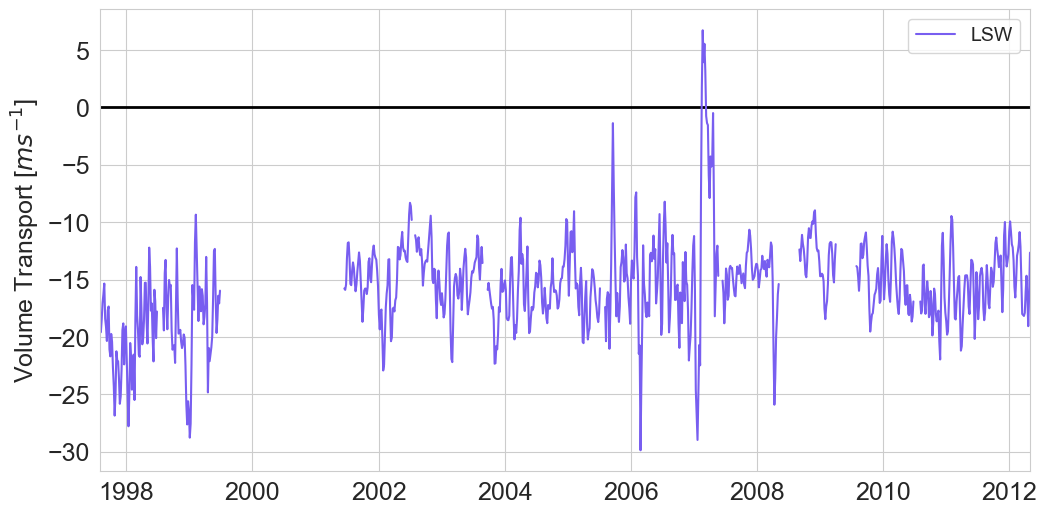

In [10]:
style = sns.set_style("whitegrid")
gsi_c = '#648fff'

fig   = plt.figure(figsize=(12, 6))
zline = plt.axhline(0, color='k', linewidth=2)

#nadw    = plt.plot(ds_zantopp.TIME, ds_zantopp.NADW_trsp, c_nadw, label = 'NADW')
lsw     = plt.plot(ds_zantopp.TIME, ds_zantopp.LSW_trsp/1e6,  c_lsw,  label = 'LSW')
#neadw   = plt.plot(ds_zantopp.TIME, ds_zantopp.NEADW_trsp,c_neadw,label = 'NEADW')
#dsow    = plt.plot(ds_zantopp.TIME, ds_zantopp.DSOW_trsp ,c_dsow, label = 'DSOW')
#lnadw   = plt.plot(ds_zantopp.TIME, ds_zantopp.LNADW_trsp,c_lnadw,label = 'LNADW')

xtix  = plt.yticks(fontsize=18)
ytix  = plt.xticks(fontsize=18)

ylab  = plt.ylabel('Volume Transport [$ms^{-1}$]', fontsize = 18)
xlab  = plt.xlabel('',fontsize = 18)

xlim  = plt.xlim(ds_zantopp.TIME[0],ds_zantopp.TIME[-1])
#ylim  = plt.ylim(-3.25,3.25)

leg   = plt.legend(fontsize = 14)

#plt.savefig(fig_path + 'gsi_time_series_altimetry.png', format='png', bbox_inches="tight",dpi=500)

## (2) Now Load ECCO Data

In [ ]:
import ecco_access as ea